In [1]:
import pandas as pd
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


In [111]:
df = pd.read_csv('Seasons_Stats.csv')

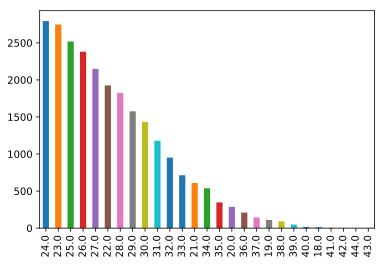

In [83]:
# простой график - сколько есть записей игроков каждого возраста 
df['Age'].value_counts().plot(kind='bar')

In [85]:
import seaborn as sns

In [98]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_movies = df_movies.dropna()

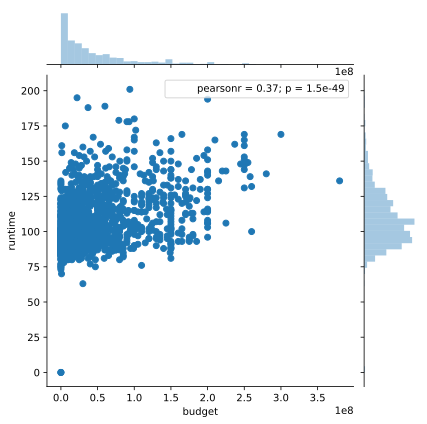

In [104]:
# посмотрим, как связаны между собой бюджет фильмов и их длительность
sns.jointplot(x='budget', y='runtime', 
              data=df_movies, kind='scatter');

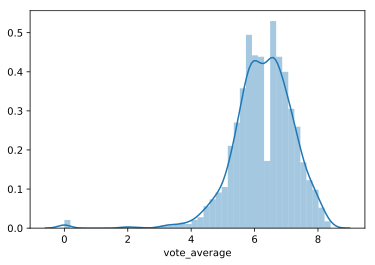

In [110]:
# посмотрим на распределение итоговых оценок фильмов
sns.distplot(df_movies.vote_average);

In [112]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [116]:
# посмотрим с помощью iplot Scatter, видна ли взаимосвязь количества голосов зрителей и бюджета фильма - это покажет
# насколько сильна реакция зрителей от высокобюджетных фильмов. (Не видна, к сожалению. Затраты не гарантируют отзывы)
trace0 = go.Scatter(
    x=df_movies.index,
    y=df_movies.budget,
    name='Budget'
)

trace1 = go.Scatter(
    x=df_movies.index,
    y=df_movies.vote_count,
    name='Votes'
)

data = [trace0, trace1]
layout = {'title': 'Budget and votes'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [127]:
# посмотрим с помощью iplot Bar окупаемость фильмов, распределенных по годам выпуска.
df_movies['year'] = pd.to_datetime(df_movies["release_date"] ).dt.year
budget_years_df = df_movies.groupby('year')[['budget']].sum()
revenue_years_df = df_movies.groupby('year')[['revenue']].sum()
years_df = budget_years_df.join(revenue_years_df)
years_df.columns = ['Budgets', 'Revenues']

In [128]:
trace0 = go.Bar(
    x=years_df.index,
    y=years_df.Budgets,
    name='Budgets',
    orientation = 'v'
)

trace1 = go.Bar(
    x=years_df.index,
    y=years_df.Revenues,
    name='Revenues',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Budgets and Revenues'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)